In [2]:
words = open('names.txt', 'r').read().splitlines()

In [4]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs,chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [5]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [6]:
import torch

In [7]:
N = torch.zeros([28,28],dtype=torch.int32)

In [8]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [9]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

(-0.5, 27.5, 27.5, -0.5)

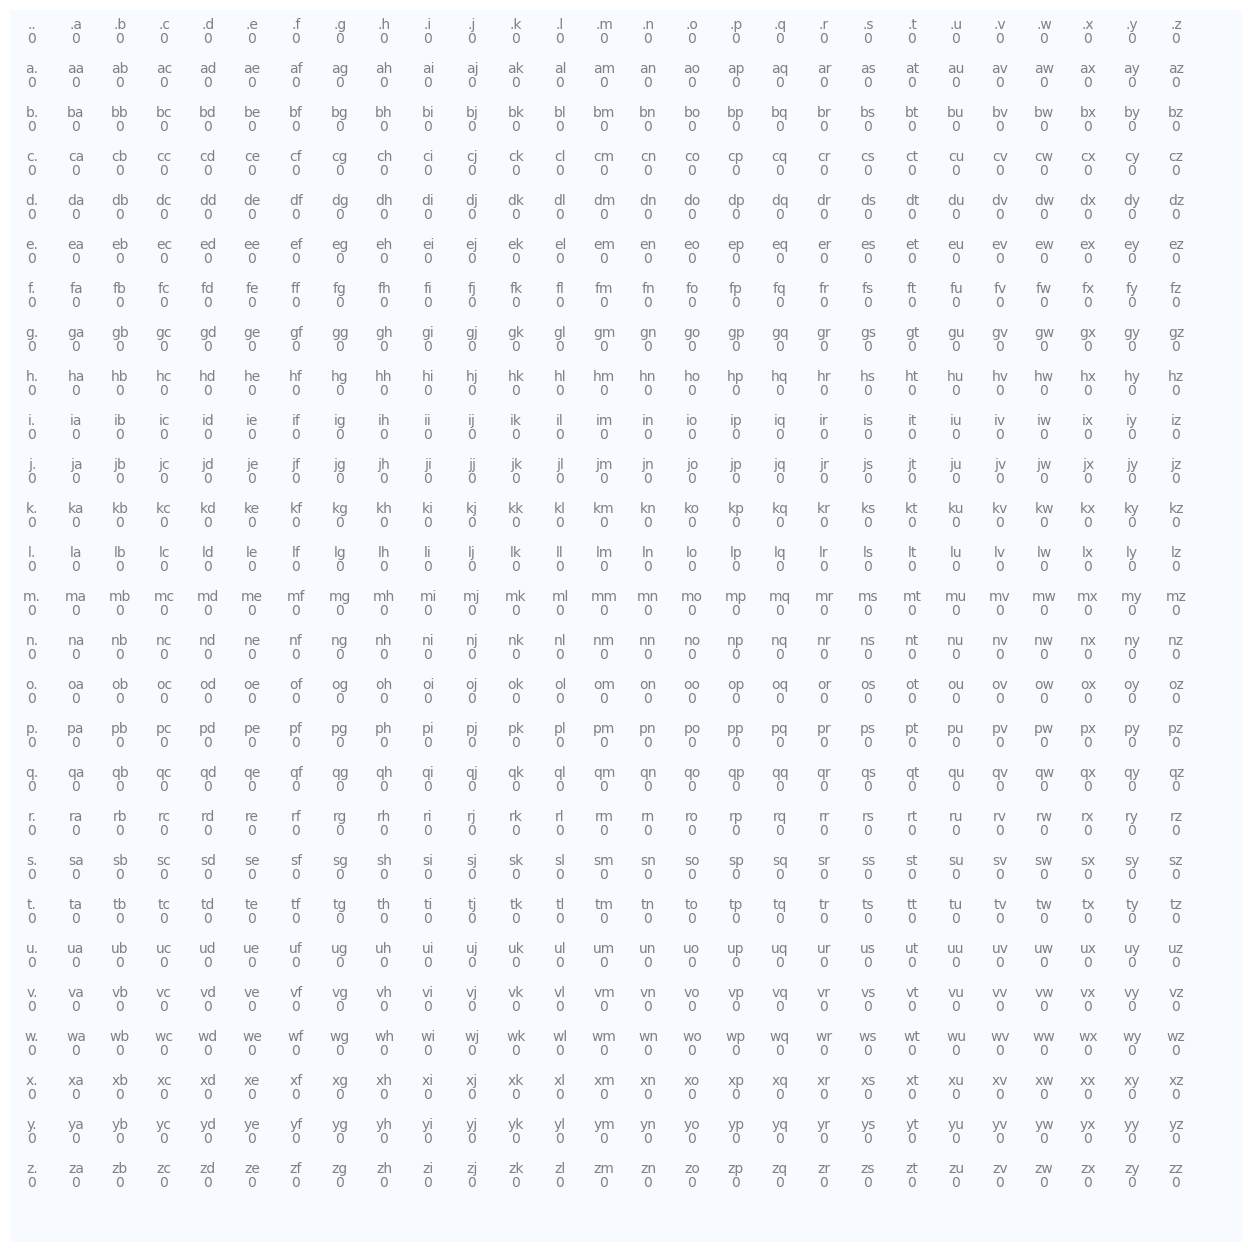

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr, ha='center',va='bottom',color='gray')
        plt.text(j,i,N[i,j].item(), ha='center',va='top',color='gray')
plt.axis('off')


In [18]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290,
        0.0000])

In [21]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1,replacement=True, generator = g).item()
itos[ix]

'j'

In [15]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p /= p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [17]:
torch.multinomial(p,num_samples=100,replacement=True, generator = g)


tensor([0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        2, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 2, 0])

In [77]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [78]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out  = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p /= p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.


In [79]:
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        log_likelihood += torch.log(prob)
        n+=1
print('-------')
print('log', log_likelihood)
nll = -log_likelihood
print('likelihood', nll / n)
        

-------
log tensor(-559978.7500)
likelihood tensor(2.4545)


In [9]:
# create the training set of bigrams
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [10]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [11]:
xenc.shape

torch.Size([5, 27])

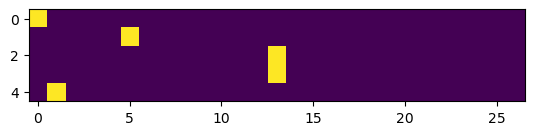

In [14]:
plt.imshow(xenc)

In [15]:
xenc.dtype

torch.float32

In [62]:
# create the training set of bigrams
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# randomly initiality 27 neurons weights. each neuron receives 27 inputs
# 27 inputs to 1 neuron represent the first character in a bigram
# the output from the neuron is the probabilistic 2nd character in the bigram
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27),generator=g, requires_grad=True)

number of examples: 228146


In [70]:
(W**2).mean()

tensor(2.2051, grad_fn=<MeanBackward0>)

In [71]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = (xenc @ W) # log-counts
    counts = logits.exp() # equivalent to N
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num),ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None # set gradient to zero
    loss.backward()

    #update
    W.data += -50 * W.grad



2.4830985069274902
2.4830610752105713
2.4830262660980225
2.4829933643341064
2.4829623699188232
2.4829323291778564
2.4829039573669434
2.4828765392303467
2.482849597930908
2.4828238487243652
2.4827992916107178
2.4827749729156494
2.4827516078948975
2.4827284812927246
2.4827070236206055
2.482685089111328
2.482663869857788
2.4826431274414062
2.4826231002807617
2.4826033115386963
2.482584238052368
2.482565402984619
2.4825470447540283
2.4825286865234375
2.482511281967163
2.4824936389923096
2.4824767112731934
2.4824600219726562
2.4824435710906982
2.4824273586273193
2.4824116230010986
2.482395887374878
2.4823808670043945
2.482365608215332
2.4823508262634277
2.4823360443115234
2.4823219776153564
2.4823074340820312
2.4822938442230225
2.4822800159454346
2.482266426086426
2.482252836227417
2.4822399616241455
2.482226848602295
2.4822144508361816
2.4822018146514893
2.482189178466797
2.4821767807006836
2.4821650981903076
2.4821529388427734
2.4821410179138184
2.4821293354034424
2.4821178913116455
2.482

In [74]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = (xenc @ W) # log-counts
        counts = logits.exp() # equivalent to N
        p = counts / counts.sum(1, keepdim=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
prelay.
a.
nn.
